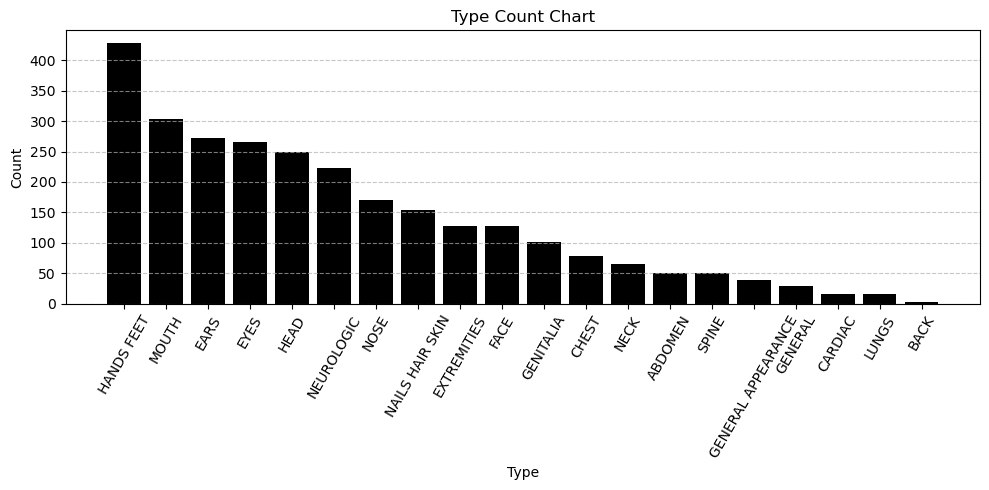

In [1]:
import matplotlib.pyplot as plt

# Data
type_count = {'MOUTH': 303, 'EXTREMITIES': 128, 'HANDS FEET': 428, 'EYES': 265, 'ABDOMEN': 50, 'CHEST': 79, 'EARS': 273, 'GENITALIA': 101, 'HEAD': 249, 'FACE': 127, 'NAILS HAIR SKIN': 154, 'SPINE': 50, 'NEUROLOGIC': 223, 'BACK': 2, 'NECK': 65, 'NOSE': 171, 'GENERAL': 29, 'CARDIAC': 16, 'LUNGS': 16, 'GENERAL APPEARANCE': 38}

# Sort the data
type_count = dict(sorted(type_count.items(), key=lambda item: item[1], reverse=True))

# Extracting data for plotting
types = list(type_count.keys())
counts = list(type_count.values())

# Creating the bar chart
plt.figure(figsize=(10, 5))
plt.bar(types, counts, color='black')
plt.xticks(rotation=60)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Type Count Chart')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

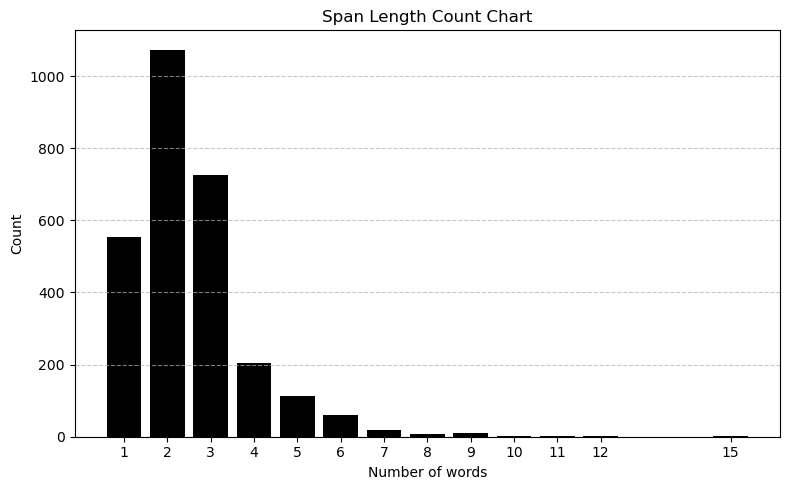

In [12]:
span_num_count = {1: 553, 2: 1073, 3: 725, 4: 203, 5: 112, 6: 60, 7: 19, 8: 8, 9: 10, 10: 1, 11: 1, 12: 1, 15: 1}


# Extracting data for plotting
types = list(span_num_count.keys())
counts = list(span_num_count.values())

# Creating the bar chart
plt.figure(figsize=(8, 5))
plt.bar(types, counts, color='black')
plt.xlabel('Number of words')
plt.ylabel('Count')
plt.title('Span Length Count Chart')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set x-axis to show only integer ticks
plt.xticks(list(span_num_count.keys()))

# Show the plot
plt.tight_layout()
plt.show()

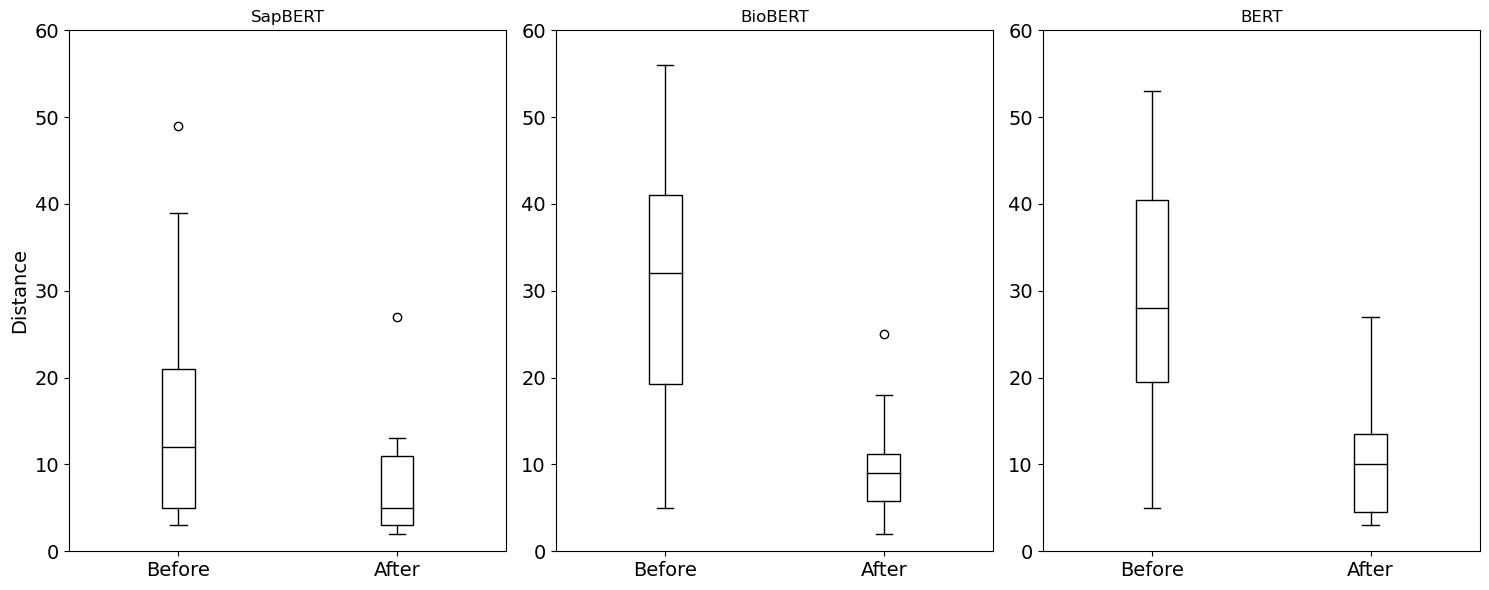

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Given dictionaries
sapbert_before = {1: 49, 2: 39, 3: 26, 4: 21, 5: 15, 6: 11, 7: 6, 8: 13, 9: 12, 10: 5, 11: 5, 12: 3, 13: 3}
sapbert_after = {1: 27, 2: 12, 3: 11, 4: 13, 5: 8, 6: 9, 7: 5, 8: 5, 9: 2, 10: 3, 11: 4, 12: 3, 13: 3}
biobert_before = {1: 35, 2: 56, 3: 38, 4: 29, 5: 24, 6: 20, 7: 42, 8: 43, 9: 49, 10: 37, 11: 19, 12: 18, 13: 9, 14: 5}
biobert_after = {1: 25, 2: 18, 3: 10, 4: 7, 5: 12, 6: 11, 7: 6, 8: 5, 9: 8, 10: 10, 11: 4, 12: 2}
bert_before = {1: 35, 2: 50, 3: 21, 4: 42, 5: 18, 6: 28, 7: 28, 8: 53, 9: 51, 10: 39, 11: 38, 12: 25, 13: 11, 14: 10, 15: 5}
bert_after = {1: 27, 2: 15, 3: 15, 4: 13, 5: 12, 6: 11, 7: 5, 8: 3, 9: 3, 10: 9, 11: 7, 12: 3}

# Determine the maximum length
max_len = max(len(sapbert_before), len(sapbert_after), len(biobert_before), len(biobert_after), len(bert_before), len(bert_after))

# Pad dictionaries with NaN to match the maximum length
def pad_dict(d, max_len):
    return {k: d.get(k, np.nan) for k in range(1, max_len+1)}

sapbert_before, sapbert_after = pad_dict(sapbert_before, max_len), pad_dict(sapbert_after, max_len)
biobert_before, biobert_after = pad_dict(biobert_before, max_len), pad_dict(biobert_after, max_len)
bert_before, bert_after = pad_dict(bert_before, max_len), pad_dict(bert_after, max_len)

# Convert dictionaries to pandas DataFrames
sapbert_data = pd.DataFrame({'Before': list(sapbert_before.values()), 'After': list(sapbert_after.values())})
biobert_data = pd.DataFrame({'Before': list(biobert_before.values()), 'After': list(biobert_after.values())})
bert_data = pd.DataFrame({'Before': list(bert_before.values()), 'After': list(bert_after.values())})

fig, axs = plt.subplots(1, 3, figsize=(15, 6))

datasets = [sapbert_data, biobert_data, bert_data]
titles = ['SapBERT', 'BioBERT', 'BERT']

colors = ['white', 'white']

for i, (data, title) in enumerate(zip(datasets, titles)):
    box = data.boxplot(ax=axs[i], grid=False, fontsize=14, patch_artist=True, return_type='dict')
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor('black')
    for element in ['whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(box[element], color='black')
    axs[i].set_title(title)

for ax in axs:
    ax.set_ylim(0, 60)

axs[0].set_ylabel('Distance', fontsize=14)

plt.tight_layout()
plt.show()
